<a href="https://colab.research.google.com/github/SergioLamosLozano/Fundamentos-RN/blob/main/Ejercicio3_series_de_taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Planteamiento del ejercicio 3:  Análisis del error en una red neuronal para clasificación**


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7099 - loss: 1.2680 - val_accuracy: 0.9021 - val_loss: 0.3989
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9046 - loss: 0.3764 - val_accuracy: 0.9231 - val_loss: 0.2853
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9218 - loss: 0.2849 - val_accuracy: 0.9311 - val_loss: 0.2452
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9329 - loss: 0.2394 - val_accuracy: 0.9390 - val_loss: 0.2168
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9393 - loss: 0.2129 - val_accuracy: 0.9450 - val_loss: 0.1967


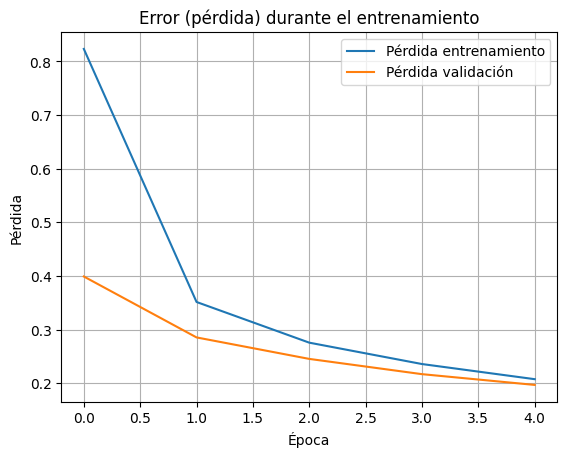

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.2236
Pérdida en prueba: 0.1979, Precisión: 0.9427


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargar y preprocesar datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Modelo simple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Graficar error (pérdida)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Error (pérdida) durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

# Evaluar en prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Pérdida en prueba: {test_loss:.4f}, Precisión: {test_acc:.4f}")